<div style="background-color:#0C2E59;" >
<p style="margin: auto; padding: 20px; text-align:center;color:#fff;font-size:22px; ">ANALYSE DES VENTES : LIBRAIRIE LAPAGE
    <br/>~ Nettoyage des données ~</p>
</div>

<div style="background:#FFEEDA;padding:10px;">
 <p> <strong>OBJECTIF DE CE NOTEBOOK :
<br/>Nettoyez les données de la librairie Lapage en vu de réaliser des analyses sur les différents indicateurs de vente.</strong>
    </p>
<p>Pour plus de clarté les analyses et tests statistiques seront traitées dans un autre notebook.</p>
    <p>Notebook avec les analyses : <a href="./RIVIERE_Aurelie_2_Notebook-Analyses_012025.ipynb" target="_blank">Notebook Analyses</a>
</p>
</div>

<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie Numpy
import numpy as np

#Importation de la librairie matplotlib pour afficher des graphiques
import matplotlib.pyplot as plt 

In [3]:
#Importation de la librairie Tabulate
#Bibliothèque permettant l'affichage sous forme de tableau
from tabulate import tabulate

In [4]:
#Librairie permettant le traitement des expressions régulières
import re

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.2 - Chargement des fichiers</h3>
</div>

In [5]:
#Importation du fichier Clients
df_customers = pd.read_csv("data/customers.csv")

#Importation du fichier Produits
df_products = pd.read_csv("data/products.csv")

#Importation du fichier Transactions
df_transactions = pd.read_csv("data/transactions.csv")

<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 2 - Analyse Exploratoire des fichiers</h2>
</div>

In [6]:
#Fonction d'analyse exploratoire des fichiers
def analyze_columns(df):
    analysis = pd.DataFrame({
        "Type": df.dtypes,  # Type de données
        "Nombre de Lignes": len(df),  # Nombre total de lignes
        "Valeurs Manquantes": df.isnull().sum(),  # Nombre de valeurs manquantes
        "Unique": [(df[col].value_counts() == 1).sum() for col in df.columns],# Compte les valeurs apparaissant exactement une fois
        "Distinct": [df[col].nunique(dropna=True) for col in df.columns], # Compte les valeurs distinctes sans inclure les NaN
        "Min": [df[col].dropna().min() for col in df.columns],# Min : Première valeur dans un ordre trié, en ignorant les NaN
        "Max": [df[col].dropna().max() for col in df.columns]# Max : Dernière valeur dans un ordre trié, en ignorant les NaN
    })

    # Conversion en tableau formaté
    formatted_table = tabulate(analysis.T, headers="keys", tablefmt="fancy_grid")
    return formatted_table

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.1 - Analyse exploratoire du fichier Clients</h3>
</div>

In [7]:
#Afficher les 5 premières lignes du dataframe
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [8]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))

# Applique la fonction d'analyse et affiche les résultats
result = analyze_columns(df_customers)
print(result)

Le tableau comporte 8623 observation(s) ou ligne(s)
Le tableau comporte 3 colonne(s)
╒════════════════════╤═════════════╤════════╤═════════╕
│                    │ client_id   │ sex    │ birth   │
╞════════════════════╪═════════════╪════════╪═════════╡
│ Type               │ object      │ object │ int64   │
├────────────────────┼─────────────┼────────┼─────────┤
│ Nombre de Lignes   │ 8623        │ 8623   │ 8623    │
├────────────────────┼─────────────┼────────┼─────────┤
│ Valeurs Manquantes │ 0           │ 0      │ 0       │
├────────────────────┼─────────────┼────────┼─────────┤
│ Unique             │ 8623        │ 0      │ 0       │
├────────────────────┼─────────────┼────────┼─────────┤
│ Distinct           │ 8623        │ 2      │ 76      │
├────────────────────┼─────────────┼────────┼─────────┤
│ Min                │ c_1         │ f      │ 1929    │
├────────────────────┼─────────────┼────────┼─────────┤
│ Max                │ ct_1        │ m      │ 2004    │
╘══════════════════

In [9]:
def analyze_identifier_structures_with_anomalies(column, max_examples=5):

    # Convertir toutes les valeurs en chaîne pour éviter les erreurs
    column = column.dropna().astype(str)

    # Trier les valeurs par ordre alphabétique
    column_sorted = column.sort_values()

    # Afficher un aperçu des 5 premières et 5 dernières lignes
    print("### Aperçu des données triées ###")
    print("5 premières lignes :")
    print(column_sorted.head(5).to_list())  # Conversion en liste pour un affichage plus propre
    print("5 dernières lignes :")
    print(column_sorted.tail(5).to_list(), "\n")

    # Remplacer tous les chiffres par "9" pour révéler les structures
    structures = column.apply(lambda x: re.sub(r'\d', '9', x))

    # Compter les occurrences des structures
    structure_counts = structures.value_counts()

    # Afficher les structures les plus fréquentes
    print("### Structures les plus fréquentes ###")
    for structure, count in structure_counts.head(max_examples).items():
        print(f"{structure}: {count}")
    print()

    # Identifier les structures rares (moins de 5 occurrences)
    rare_structures = structure_counts[structure_counts < 5]

    anomaliesclients = []
    if not rare_structures.empty:
        print("### Structures rares (potentielles anomalies) ###")
        for structure, count in rare_structures.items():
            print(f"{structure}: {count}")
            # Ajouter les identifiants correspondant à cette structure rare
            anomaliesclients.extend(column[structures == structure].tolist())
        print()
    else:
        print("Aucune structure rare détectée.\n")

    # Retourner les anomalies pour vérification manuelle
    return anomaliesclients

# Application de l'analyse
if 'client_id' in df_customers.columns:
    # Identifier les anomalies et les stocker dans une liste
    anomaliesclients = analyze_identifier_structures_with_anomalies(df_customers['client_id'])
    print("Liste des anomalies détectées :", anomaliesclients)

else:
    print("La colonne 'client_id' n'existe pas dans df_products.")

### Aperçu des données triées ###
5 premières lignes :
['c_1', 'c_10', 'c_100', 'c_1000', 'c_1001']
5 dernières lignes :
['c_997', 'c_998', 'c_999', 'ct_0', 'ct_1'] 

### Structures les plus fréquentes ###
c_9999: 7622
c_999: 900
c_99: 90
c_9: 9
ct_9: 2

### Structures rares (potentielles anomalies) ###
ct_9: 2

Liste des anomalies détectées : ['ct_0', 'ct_1']


<div style="background:#FFEEDA;padding:10px;">
  <strong>L&apos;analyse du fichier client montre qu&apos;il n&apos;y a pas d&apos;erreur sur ce fichier.</strong>
  <ul>
      <li>Il n&apos;y a pas de doublons dans les id clients et pas de valeurs manquantes.</strong>
      <li>Le colonne des sexes n&apos;a pas de valeurs manquantes et contient uniquement l&apos;info f ou m.</li>
      <li>La colonne d&apos;année de naissance n&apos;a pas de valeurs manquantes et les années vont de 1929 à 2004. <strong>On pourrait s&apos;intéroger sur la valeur extrème 1929, qui semble être un outliers (client de près de 100 ans), cependant cela n&apos;exclue pas la possibité que cette valeur soient juste.</strong></li>
      <li>Il y a cependant deux clients avec une sturcture anormale CT, qui correspond à client Test</li>
  </ul>
</div>

In [10]:
#Nettoyage des clients test
df_customers = df_customers[~df_customers['client_id'].isin(anomaliesclients)]

In [11]:
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_customers.shape[0]))

Le tableau comporte 8621 observation(s) ou ligne(s)


<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.2 - Analyse exploratoire du fichier Produits</h3>
</div>

In [12]:
#Afficher les 5 premières lignes du dataframe
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

# Applique la fonction d'analyse et affiche les résultats
result = analyze_columns(df_products)
print(result)

Le tableau comporte 3287 observation(s) ou ligne(s)
Le tableau comporte 3 colonne(s)
╒════════════════════╤═══════════╤═════════╤═════════╕
│                    │ id_prod   │ price   │ categ   │
╞════════════════════╪═══════════╪═════════╪═════════╡
│ Type               │ object    │ float64 │ int64   │
├────────────────────┼───────────┼─────────┼─────────┤
│ Nombre de Lignes   │ 3287      │ 3287    │ 3287    │
├────────────────────┼───────────┼─────────┼─────────┤
│ Valeurs Manquantes │ 0         │ 0       │ 0       │
├────────────────────┼───────────┼─────────┼─────────┤
│ Unique             │ 3287      │ 1111    │ 0       │
├────────────────────┼───────────┼─────────┼─────────┤
│ Distinct           │ 3287      │ 1455    │ 3       │
├────────────────────┼───────────┼─────────┼─────────┤
│ Min                │ 0_0       │ -1.0    │ 0       │
├────────────────────┼───────────┼─────────┼─────────┤
│ Max                │ T_0       │ 300.0   │ 2       │
╘════════════════════╧═══════════╧═

<div style="background:#FFEEDA;padding:10px;">
  <strong>L&apos;analyse du fichier Produits nous permet d'observer :</strong>
  <ul>
      <li>Il n&apos;y a pas de doublons dans les id produits et pas de valeurs manquantes.<strong> On observe dans les valeurs min et max des structures significativement différentes, il serait intéressant de vérifier les stuctures d'identifiant.</strong></li>
      <li>Les catégories de produits sonta au nombre de 3, il n'y a pas de valeur manquantes ou données abérantes</li>
      <li>La colonne de prix n'a pas de valeurs manquantes.<strong> On note cependant la préscence de prix en négatif, ce point est à approfoncir.</strong></li>
  </ul>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.1 - Analyse des identifiants produits</h4>
</div>

In [14]:
def analyze_identifier_structures_with_anomalies(column, max_examples=5):

    # Convertir toutes les valeurs en chaîne pour éviter les erreurs
    column = column.dropna().astype(str)

    # Trier les valeurs par ordre alphabétique
    column_sorted = column.sort_values()

    # Afficher un aperçu des 5 premières et 5 dernières lignes
    print("### Aperçu des données triées ###")
    print("5 premières lignes :")
    print(column_sorted.head(5).to_list())  # Conversion en liste pour un affichage plus propre
    print("5 dernières lignes :")
    print(column_sorted.tail(5).to_list(), "\n")

    # Remplacer tous les chiffres par "9" pour révéler les structures
    structures = column.apply(lambda x: re.sub(r'\d', '9', x))

    # Compter les occurrences des structures
    structure_counts = structures.value_counts()

    # Afficher les structures les plus fréquentes
    print("### Structures les plus fréquentes ###")
    for structure, count in structure_counts.head(max_examples).items():
        print(f"{structure}: {count}")
    print()

    # Identifier les structures rares (moins de 2 occurrences)
    rare_structures = structure_counts[structure_counts < 2]

    anomalies = []
    if not rare_structures.empty:
        print("### Structures rares (potentielles anomalies) ###")
        for structure, count in rare_structures.items():
            print(f"{structure}: {count}")
            # Ajouter les identifiants correspondant à cette structure rare
            anomalies.extend(column[structures == structure].tolist())
        print()
    else:
        print("Aucune structure rare détectée.\n")

    # Retourner les anomalies pour vérification manuelle
    return anomalies

# Application de l'analyse
if 'id_prod' in df_products.columns:
    # Identifier les anomalies et les stocker dans une liste
    anomalies = analyze_identifier_structures_with_anomalies(df_products['id_prod'])
    print("Liste des anomalies détectées :", anomalies)

else:
    print("La colonne 'id_prod' n'existe pas dans df_products.")

### Aperçu des données triées ###
5 premières lignes :
['0_0', '0_1', '0_10', '0_100', '0_1000']
5 dernières lignes :
['2_96', '2_97', '2_98', '2_99', 'T_0'] 

### Structures les plus fréquentes ###
9_999: 1678
9_9999: 1308
9_99: 270
9_9: 30
T_9: 1

### Structures rares (potentielles anomalies) ###
T_9: 1

Liste des anomalies détectées : ['T_0']


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.2 - Analyse complémentaire des prix Produits</h4>
</div>

In [15]:
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_products['price'].isnull().sum()))
#Afficher le prix minimum de la colonne "price"
print('Prix minimum : ', df_products['price'].min())
#Afficher le prix maximum de la colonne "price"
print('Prix maximum : ', df_products['price'].max())
print("\n")
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_negatifs = df_products[df_products['price'] < 0][['id_prod', 'price']]
print("Articles avec des prix négatifs :")
print(tabulate(prix_negatifs, headers='keys', tablefmt='grid'))


Nombres d'article avec un prix non renseignés: 0
Prix minimum :  -1.0
Prix maximum :  300.0


Articles avec des prix négatifs :
+-----+-----------+---------+
|     | id_prod   |   price |
+=====+===========+=========+
| 731 | T_0       |      -1 |
+-----+-----------+---------+


<div style="background:#FFEEDA;padding:10px;">
  <strong>Ces analyses complémentaires ont permis d'observer :</strong>
  <ul>
      <li>Un identifiant produit dont la stucture ne respecte pas la stucture habituelle</li>
      <li>Un prix présent en négatif. On notera d'ailleur que ce prix en négatif et celui de l'identifiant produit en anomalie.</li>
  </ul>
    <strong>Cette ligne doit donc être supprimée avant analyse.</strong>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.3 - Nettoyage du fichier Produits</h4>
</div>

In [16]:
#Suppression des données en anomalies
df_products = df_products[~df_products['id_prod'].isin(anomalies)]

In [17]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

Le tableau comporte 3286 observation(s) ou ligne(s)
Le tableau comporte 3 colonne(s)


<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.3 - Analyse exploratoire du fichier Transaction</h3>
</div>

In [18]:
#Afficher les 5 premières lignes du dataframe
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [19]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

# Applique la fonction d'analyse et affiche les résultats
result = analyze_columns(df_transactions)
print(result)

Le tableau comporte 679532 observation(s) ou ligne(s)
Le tableau comporte 4 colonne(s)
╒════════════════════╤═══════════╤═════════════════════════════════╤══════════════╤═════════════╕
│                    │ id_prod   │ date                            │ session_id   │ client_id   │
╞════════════════════╪═══════════╪═════════════════════════════════╪══════════════╪═════════════╡
│ Type               │ object    │ object                          │ object       │ object      │
├────────────────────┼───────────┼─────────────────────────────────┼──────────────┼─────────────┤
│ Nombre de Lignes   │ 679532    │ 679532                          │ 679532       │ 679532      │
├────────────────────┼───────────┼─────────────────────────────────┼──────────────┼─────────────┤
│ Valeurs Manquantes │ 0         │ 0                               │ 0            │ 0           │
├────────────────────┼───────────┼─────────────────────────────────┼──────────────┼─────────────┤
│ Unique             │ 18      

<div style="background:#FFEEDA;padding:10px;">
  <strong>L&apos;analyse du fichier Transcations nous permet d'observer :</strong>
  <ul>
      <li>Il y a des doublons produits, cohérent avec la vente multiple du même produits.</li>
      <li>Les dates des transactions semble avoir des éléments de test intégré. <strong>Ces éléments sont à nettoyer avant analyse.</strong></li>
      <li>Les sessions n'ont pas de valeurs manquantes, il y a une répétition cohérente avec l'achat de plusieurs produits par session, et la nomenclature semble correcte.</li>
      <li>Les identifiants clients n'ont pas de valeurs manquantes, la répatition est du à des achats multiple. <strong>Il semble y avoir une incohérence de stucture dans la nomenclature.</strong></li>
  </ul>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.1 - Nettoyage des dates de test</h4>
</div>

In [20]:
def find_invalid_date_format(df, date):
    # Définir le format attendu (YYYY-MM-DD HH:MM:SS.ssssss)
    date_regex = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{6}$'

    # Filtrer les lignes qui ne correspondent pas au format
    invalid_rows = df[~df[date].astype(str).str.match(date_regex, na=False)]

    return invalid_rows

# Exemple d'utilisation avec df_transactions
invalid_dates = find_invalid_date_format(df_transactions, 'date')
print("Lignes avec un format de date incorrect :")
print(invalid_dates)

Lignes avec un format de date incorrect :
       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


<div style="background:#FFEEDA;padding:10px;">
On observe un certain nombre de dates avec la mention test. On notera également que ces tests porte sur l'id produit T_0, qui correspond à notre produit identifiant/prix en anomalie dans la base produits.<strong> Ce produit est donc bien un produit test avec des transctions test, à supprimer avant analyse.</strong>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.2 - Vérification de la nomenclature des id clients</h4>
</div>

In [21]:
def analyze_identifier_structures_with_anomalies(column, max_examples=5):

    # Convertir toutes les valeurs en chaîne pour éviter les erreurs
    column = column.dropna().astype(str)

    # Trier les valeurs par ordre alphabétique
    column_sorted = column.sort_values()

    # Afficher un aperçu des 5 premières et 5 dernières lignes
    print("### Aperçu des données triées ###")
    print("5 premières lignes :")
    print(column_sorted.head(5).to_list())  # Conversion en liste pour un affichage plus propre
    print("5 dernières lignes :")
    print(column_sorted.tail(5).to_list(), "\n")

    # Remplacer tous les chiffres par "9" pour révéler les structures
    structures = column.apply(lambda x: re.sub(r'\d', '9', x))

    # Compter les occurrences des structures
    structure_counts = structures.value_counts()

    # Afficher les structures les plus fréquentes
    print("### Structures les plus fréquentes ###")
    for structure, count in structure_counts.head(max_examples).items():
        print(f"{structure}: {count}")
    print()

    # Identifier les structures rares (moins de 2 occurrences)
    rare_structures = structure_counts[structure_counts < 2]

    anomalies_client_id = []
    if not rare_structures.empty:
        print("### Structures rares (potentielles anomalies) ###")
        for structure, count in rare_structures.items():
            print(f"{structure}: {count}")
            # Ajouter les identifiants correspondant à cette structure rare
            anomalies_client_id.extend(column[structures == structure].tolist())
        print()
    else:
        print("Aucune structure rare détectée.\n")

    # Retourner les anomalies pour vérification manuelle
    return anomalies_client_id

# Application de l'analyse
if 'client_id' in df_transactions.columns:
    # Identifier les anomalies et les stocker dans une liste
    anomalies_client_id = analyze_identifier_structures_with_anomalies(df_transactions['client_id'])
    print("Liste des anomalies détectées :", anomalies_client_id)
else:
    print("La colonne 'client_id' n'existe pas dans df_transactions.")

### Aperçu des données triées ###
5 premières lignes :
['c_1', 'c_1', 'c_1', 'c_1', 'c_1']
5 dernières lignes :
['ct_1', 'ct_1', 'ct_1', 'ct_1', 'ct_1'] 

### Structures les plus fréquentes ###
c_9999: 606175
c_999: 66515
c_99: 5731
c_9: 911
ct_9: 200

Aucune structure rare détectée.

Liste des anomalies détectées : []


<div style="background:#FFEEDA;padding:10px;">
On observe une structure différente des autres avec ct, présente 200 fois, ce qui correspond également au nombre de date de test.<strong> Cet identifiant client est donc notre identifiant client test. Il sera également supprimer avec les transactions associées.</strong><br/>Le nombre de lignes avec l'id test correspond aux nombres de lignes de date test.
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.3 - Nettoyage du fichier transactions</h4>
</div>

In [22]:
#Supression des transactions test à partir de l'identifiant produit T_0
df_transactions = df_transactions[df_transactions['id_prod'] != 'T_0']

In [23]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou ligne(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 679332 observation(s) ou ligne(s)
Le tableau comporte 4 colonne(s)


<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 3 - Analyse des différents indicateurs de vente</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.1 - Évolution dans le temps du chiffre d'affaire</h3>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.1.1 - Fusion des dataframes transcations et produits</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">
On fusionne les dataframes transactions et produits afin de définir le chiffres d'affaires et les périodes associées.
</div>

In [24]:
#Calcul de la période couverte par les données
date_min = df_transactions['date'].min()
date_max = df_transactions['date'].max()
date_min, date_max

('2021-03-01 00:01:07.843138', '2023-02-28 23:58:30.792755')

<div style="background:#FFEEDA;padding:10px;">
La période observée s'étend du <strong>1 mars 2021</strong> au <strong>28 février 2023</strong>.
</div>

In [25]:
#Joindre les dataframes produits et transcations
df_transactions_detaillees = pd.merge(df_transactions, df_products, on='id_prod', how='left')

# Vérifier les transactions sans correspondance (colonnes issues de df_products sont NaN)
transactions_non_associees = df_transactions_detaillees[df_transactions_detaillees['price'].isna() | df_transactions_detaillees['categ'].isna()]

# Afficher les transactions non associées
print("Transactions non associées :")
print(transactions_non_associees)

# Compter le nombre de transactions non associées
print(f"Nombre de transactions non associées : {len(transactions_non_associees)}")

Transactions non associées :
       id_prod                        date session_id client_id  price  categ
2633    0_2245  2022-09-23 07:22:38.636773   s_272266    c_4746    NaN    NaN
10103   0_2245  2022-07-23 09:24:14.133889   s_242482    c_6713    NaN    NaN
11723   0_2245  2022-12-03 03:26:35.696673   s_306338    c_5108    NaN    NaN
15670   0_2245  2021-08-16 11:33:25.481411    s_76493    c_1391    NaN    NaN
16372   0_2245  2022-07-16 05:53:01.627491   s_239078    c_7954    NaN    NaN
...        ...                         ...        ...       ...    ...    ...
669533  0_2245  2021-08-25 09:06:03.504061    s_80395     c_131    NaN    NaN
670484  0_2245  2022-03-06 19:59:19.462288   s_175311    c_4167    NaN    NaN
671088  0_2245  2022-05-16 11:35:20.319501   s_209381    c_4453    NaN    NaN
675480  0_2245  2022-02-11 09:05:43.952857   s_163405    c_1098    NaN    NaN
677797  0_2245  2021-12-14 22:34:54.589921   s_134446    c_4854    NaN    NaN

[221 rows x 6 columns]
Nombre de t

In [26]:
#On supprime les transactions sans produits
df_transactions_detaillees = df_transactions_detaillees[df_transactions_detaillees['price'].notna() & df_transactions_detaillees['categ'].notna()]

#Remettre le bon type sur la catégorie
df_transactions_detaillees['categ'] = df_transactions_detaillees['categ'].astype(int)

In [27]:
# Conversion de la colonne 'date' en datetime
df_transactions_detaillees['date'] = pd.to_datetime(df_transactions_detaillees['date'], errors='coerce')

# Ajouter une colonne pour les mois au format MM-YYYY
df_transactions_detaillees['month'] = df_transactions_detaillees['date'].dt.to_period('M')

# Afficher un aperçu
print(df_transactions_detaillees[['date', 'month']].head())

                        date    month
0 2022-05-20 13:21:29.043970  2022-05
1 2022-02-02 07:55:19.149409  2022-02
2 2022-06-18 15:44:33.155329  2022-06
3 2021-06-24 04:19:29.835891  2021-06
4 2023-01-11 08:22:08.194479  2023-01


In [28]:
df_transactions_detaillees.head()

,id_prod,date,session_id,client_id,price,categ,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,2023-01


In [29]:
# Faire un group by sur le mois et calculer la somme des prix (chiffre d'affaires)
df_ca_mensuel = df_transactions_detaillees.groupby('month')['price'].sum().reset_index()

# Réorganiser le DataFrame par ordre chronologique
df_ca_mensuel = df_ca_mensuel.sort_values(by='month')

# Afficher les premières lignes du DataFrame
df_ca_mensuel.head(24)

,month,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


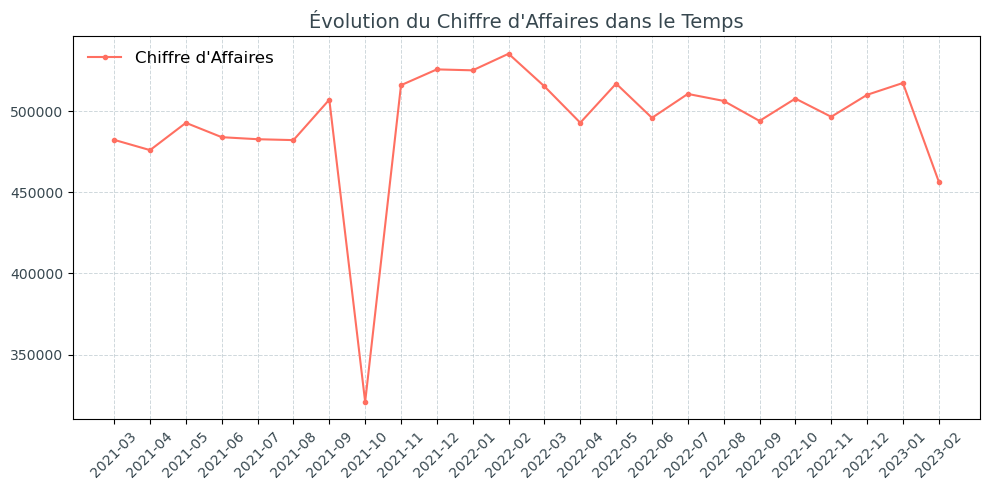

In [30]:
# graphique de l'évolution du CA dans le temps

# Configuration de la figure
plt.figure(figsize=(10, 5))

# Traçage des données avec un thème amélioré
plt.plot(
    df_ca_mensuel['month'].astype(str),
    df_ca_mensuel['price'],
    marker='.',
    color='#FF6F61',  # Couleur de la ligne
    linestyle='-',
    label='Chiffre d\'Affaires'
)

# Titres et labels
plt.title('Évolution du Chiffre d\'Affaires dans le Temps', fontsize=14, color='#37474F')  # Couleur du titre
plt.xticks(rotation=45, fontsize=10, color='#37474F')  # Taille de la police et rotation des mois
plt.yticks(fontsize=10, color='#37474F')

# Personnalisation de la grille
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5')  # Grille en gris doux

# Ajout de la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()

<div style="background:#FFEEDA;padding:10px;">
On observe au mois d'octobre 2010 une chute importante et anormale du CA. Une telle chute marque une certaine incohérence dans les données, et n'est pas représentative d'une activité normale.
    <br/>Afin de compler ce résultat abérrant nous allons effectuer une extrapolation des résultats pour le mois d'octobre.
</div>

In [31]:
# Interpolation linéaire uniquement pour octobre 2021
october_2021_index = df_ca_mensuel.index[df_ca_mensuel['month'] == '2021-10'][0]

# Calcul de la valeur interpolée pour octobre 2021 (moyenne des mois adjacents)
october_2021_price_interpolated = (
    df_ca_mensuel.loc[october_2021_index - 1, 'price'] + 
    df_ca_mensuel.loc[october_2021_index + 1, 'price']
) / 2

# Affichage de la valeur interpolée
print(f"Valeur interpolée pour octobre 2021 : {october_2021_price_interpolated:.2f} €")

Valeur interpolée pour octobre 2021 : 511704.20 €


In [32]:
# Mise à jour de la valeur dans le DataFrame
df_ca_mensuel.loc[october_2021_index, 'price'] = october_2021_price_interpolated

# Vérification de la mise à jour
df_ca_mensuel.head(23)

,month,price
0,2021-03,482440.610
1,2021-04,476109.300
2,2021-05,492943.470
3,2021-06,484088.560
4,2021-07,482835.400
5,2021-08,482284.790
6,2021-09,507240.680
7,2021-10,511704.205
8,2021-11,516167.730
9,2021-12,525917.280


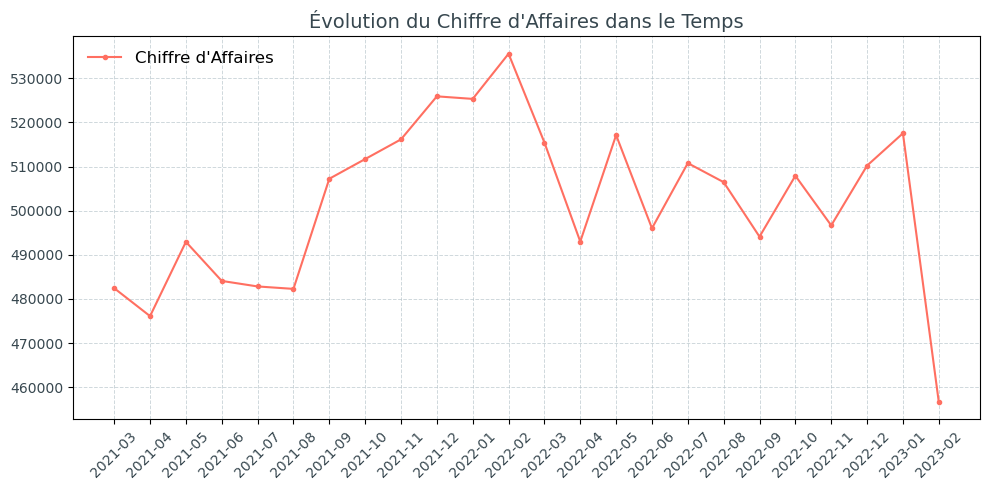

In [33]:
# graphique de l'évolution du CA dans le temps

# Configuration de la figure
plt.figure(figsize=(10, 5))

# Traçage des données avec un thème amélioré
plt.plot(
    df_ca_mensuel['month'].astype(str),
    df_ca_mensuel['price'],
    marker='.',
    color='#FF6F61',  # Couleur de la ligne
    linestyle='-',
    label='Chiffre d\'Affaires'
)

# Titres et labels
plt.title('Évolution du Chiffre d\'Affaires dans le Temps', fontsize=14, color='#37474F')  # Couleur du titre
plt.xticks(rotation=45, fontsize=10, color='#37474F')  # Taille de la police et rotation des mois
plt.yticks(fontsize=10, color='#37474F')

# Personnalisation de la grille
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5')  # Grille en gris doux

# Ajout de la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()

<div style="background:#FFEEDA;padding:10px;">
    <strong>IMPORTANT !!</strong>
    <br/>Nous avons constaté que le fichier "Transcations" comporte un grand nombre de lignes absentes.
    <br>Afin de ne pas fausser les résultats suivants nous repartirons donc sur le fichier transactions validé (déjà nettoyé) pour nos analyses.
    <p>Pour plus de clarté les analyses et tests statistiques seront traitées dans un autre notebook.</p>
    <p>Notebook avec les analyses : <a href="./RIVIERE_Aurelie_2_Notebook-Analyses_012025.ipynb" target="_blank">Notebook Analyses</a>
</p>
</div>